In [19]:
import pandas as pd
from model_training_utils import fix_betti_string_mitdb
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

## Data prep

In [20]:
df = pd.read_csv('data_sliced_tda/mitDB.csv')
# type fix
df['betti_H0'] = df['betti'].apply(lambda x: fix_betti_string_mitdb(x)[0])
df['betti_H1'] = df['betti'].apply(lambda x: fix_betti_string_mitdb(x)[1])

# Turn the list into a np.array of floats
df['betti_H1'] = df['betti_H1'].apply(lambda x: (np.array([float(num) for num in x])))
df['betti_H0'] = df['betti_H0'].apply(lambda x: (np.array([float(num) for num in x])))

In [21]:
# Split the data into data and classes
X, y = df['betti_H1'], df['ann']

# Split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=420)

# Encode the classes
y_train = to_categorical(np.array(y_train.to_list()))

# Reshape input shape
X_train = np.array(X_train.to_list())
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)

## Model training

In [22]:
model = load_model('models_raw/4conv_1dens32_dropout050.hdf5')

In [23]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.2, verbose=1)

Epoch 1/5
547/547 [==============================] - 30s 53ms/step - loss: 0.5498 - accuracy: 0.7536 - val_loss: 0.4767 - val_accuracy: 0.7844
Epoch 2/5
547/547 [==============================] - 29s 54ms/step - loss: 0.4873 - accuracy: 0.7793 - val_loss: 0.4551 - val_accuracy: 0.7887
Epoch 3/5
547/547 [==============================] - 30s 55ms/step - loss: 0.4716 - accuracy: 0.7877 - val_loss: 0.4465 - val_accuracy: 0.7982
Epoch 4/5
547/547 [==============================] - 31s 57ms/step - loss: 0.4610 - accuracy: 0.7916 - val_loss: 0.4318 - val_accuracy: 0.8012
Epoch 5/5
547/547 [==============================] - 32s 58ms/step - loss: 0.4502 - accuracy: 0.7968 - val_loss: 0.4218 - val_accuracy: 0.8052


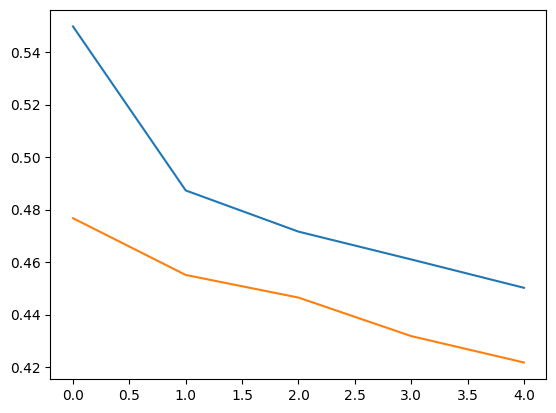

In [24]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

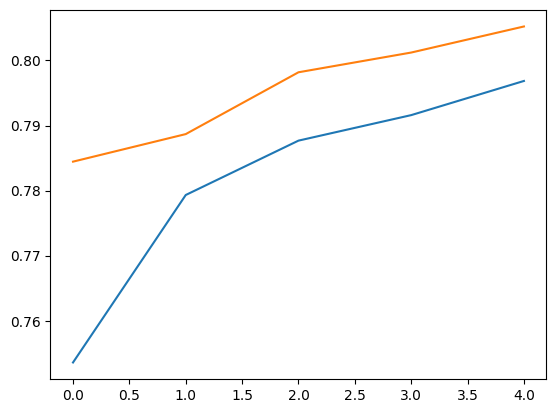

In [25]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])

## Model testing and evaluating

In [26]:
# Encode the test classes
y_test = to_categorical(np.array(y_test.to_list()))

In [27]:
X_test = np.array(X_test.to_list())
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

683/683 [==============================] - 3s 5ms/step - loss: 0.4213 - accuracy: 0.8063
Test Loss: 0.42133697867393494
Test Accuracy: 0.8063172101974487


In [28]:
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(model.predict(X_test), axis=1)

confusion_matrix(y_true, y_pred)

683/683 [==============================] - 3s 4ms/step


array([[16127,   449],
       [ 3782,  1487]])

In [29]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     16576
           1       0.77      0.28      0.41      5269

    accuracy                           0.81     21845
   macro avg       0.79      0.63      0.65     21845
weighted avg       0.80      0.81      0.77     21845



In [30]:
model.save("models_trained/4conv_1dens32_dropout050_mitDB_080acc.hdf5")